In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import src.utilities as utils

In [35]:
connection = utils.db_connection()
df_marketing = pd.read_sql('SELECT * FROM marketing_spend', con=connection)
df_subscriptions = pd.read_sql('SELECT * FROM subscriptions', con=connection)

array([<AxesSubplot:xlabel='Date', ylabel='Nuber of clients'>,
       <AxesSubplot:xlabel='Date', ylabel='Nuber of clients'>],
      dtype=object)

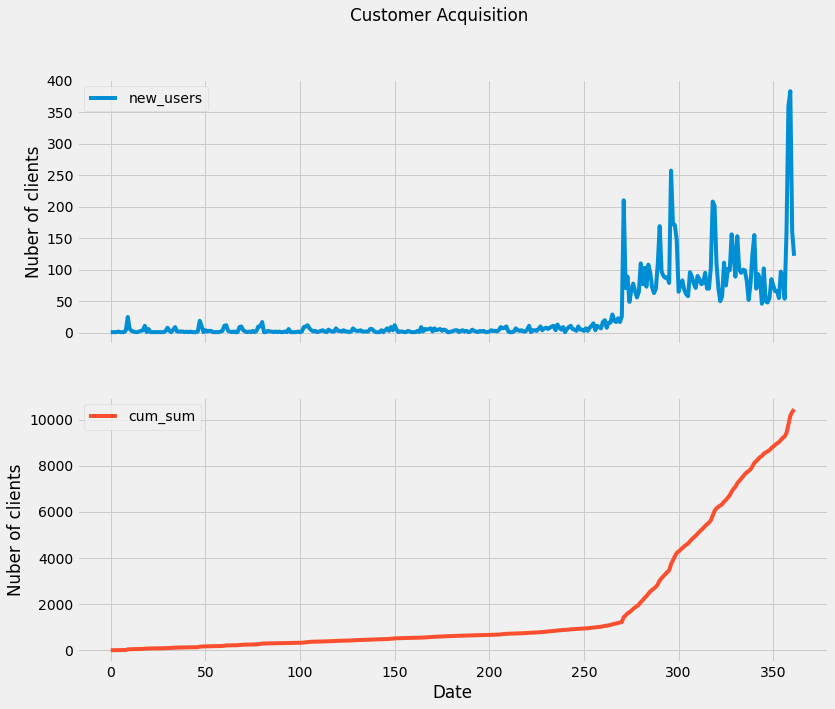

In [36]:
df_users_acquisition = df_subscriptions[["user_id", "user_created_date"]].groupby("user_created_date")["user_id"].nunique().reset_index(name='new_users')

df_users_acquisition["cum_sum"] = df_users_acquisition["new_users"].cumsum()
# plt.plot(df_users_acquisition[["new_users", "cum_sum"]])
df_users_acquisition.plot(subplots=True, figsize=(12, 10), xlabel="Date", ylabel="Number of clients",
                          title="Customer Acquisition")

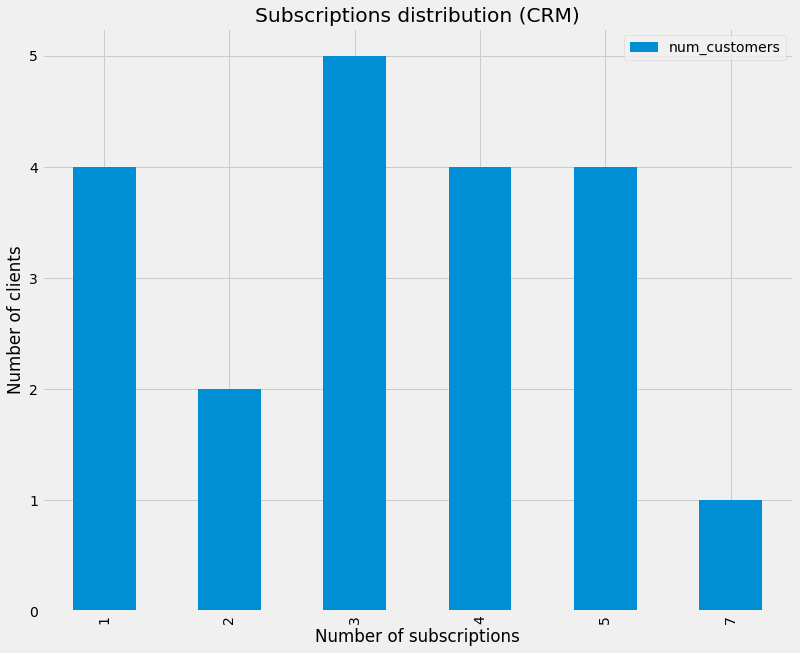

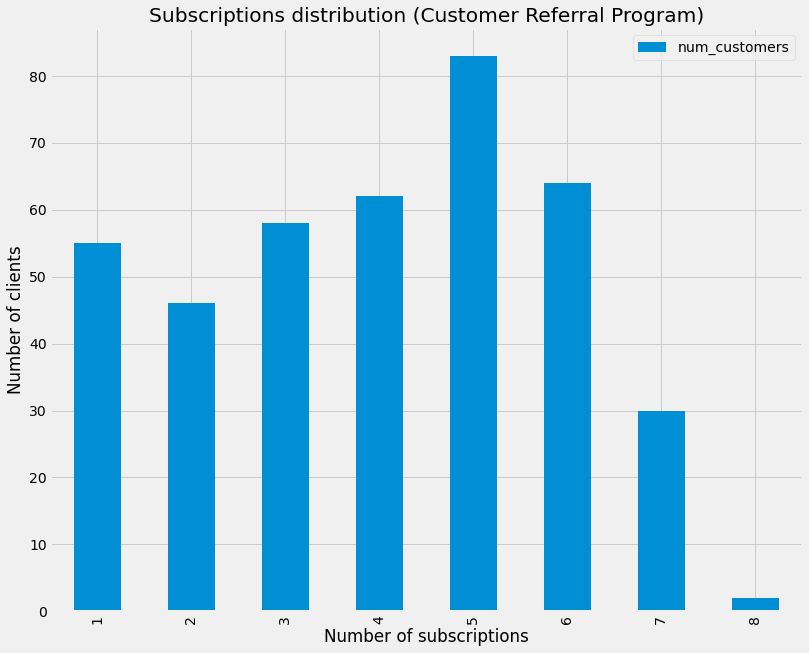

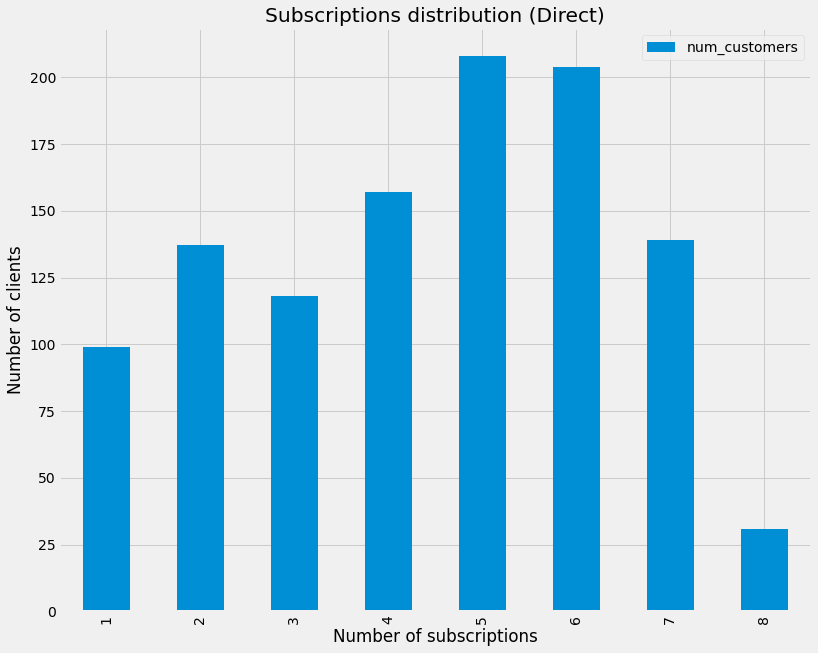

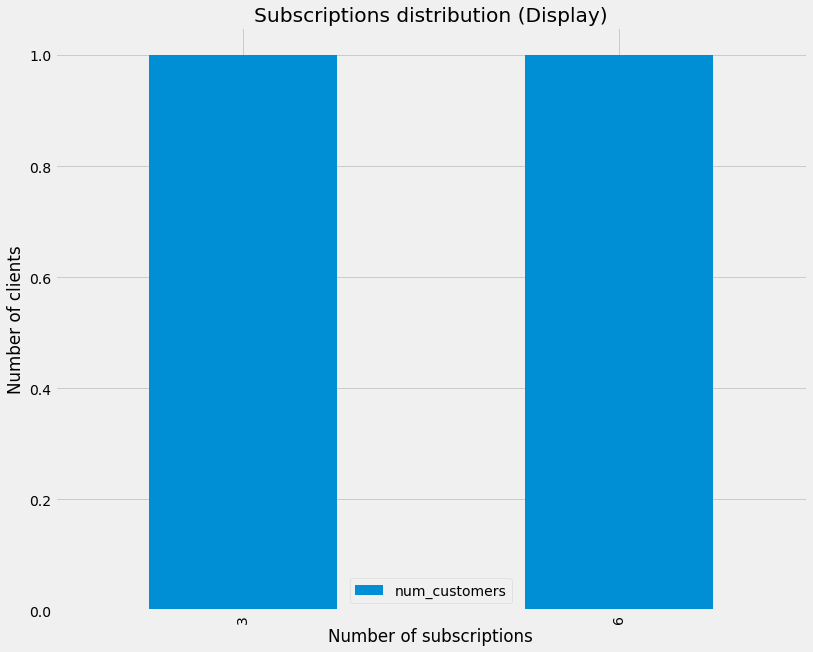

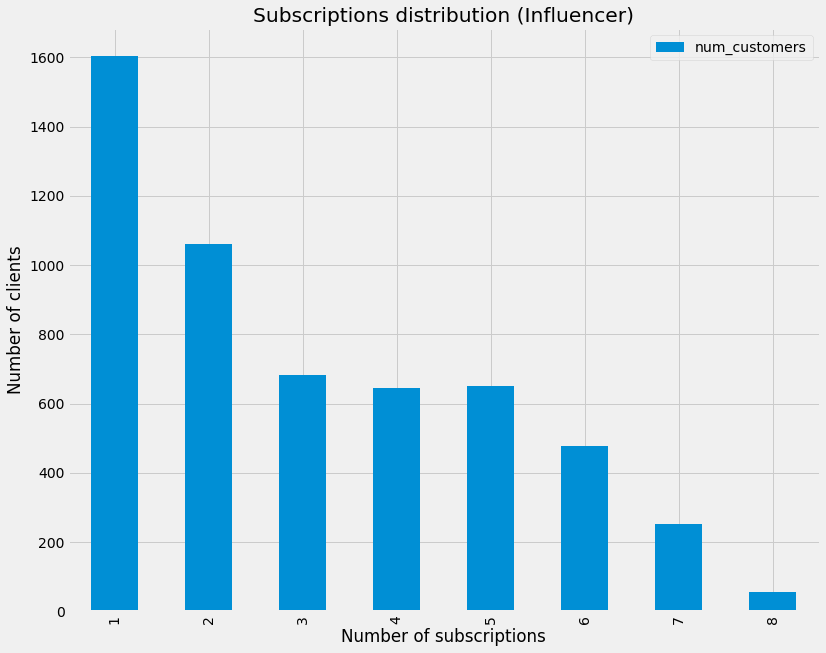

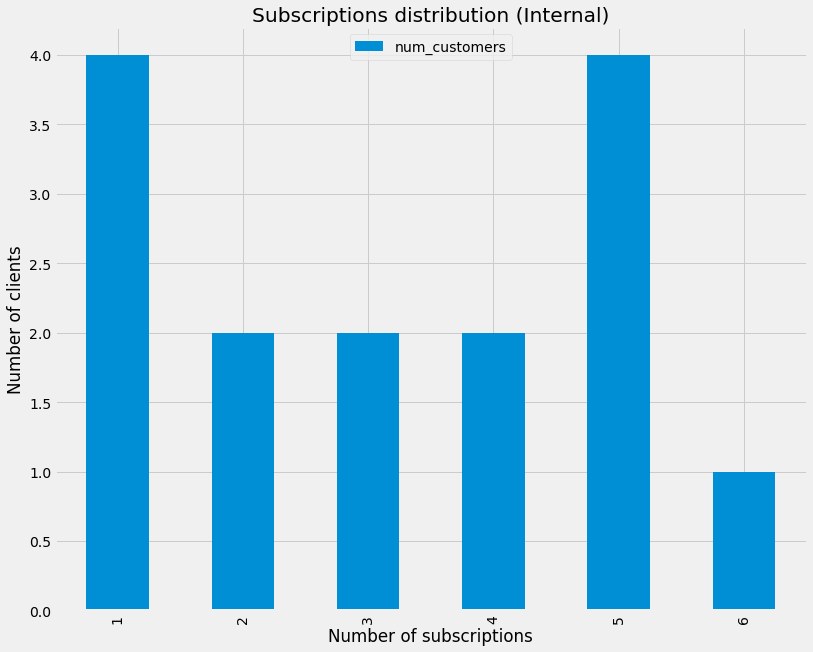

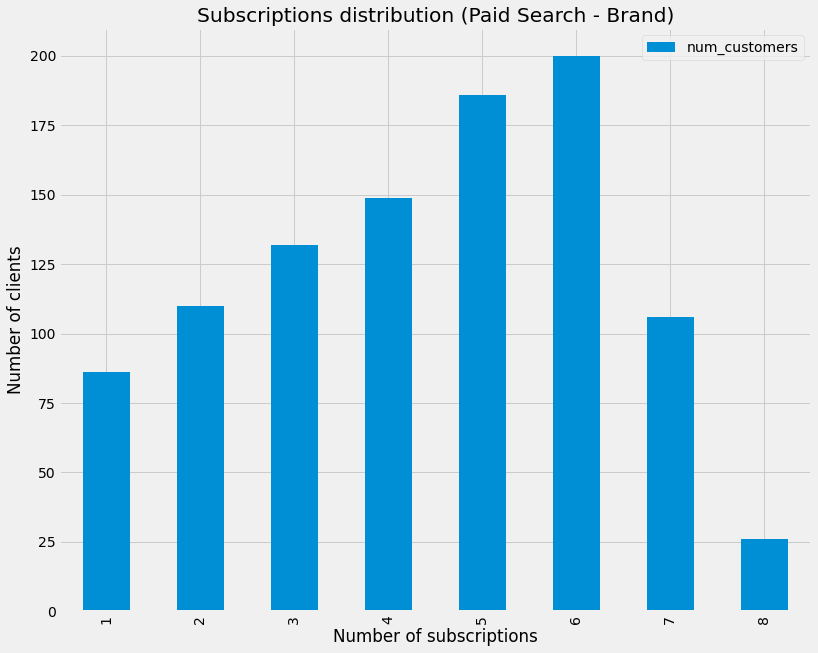

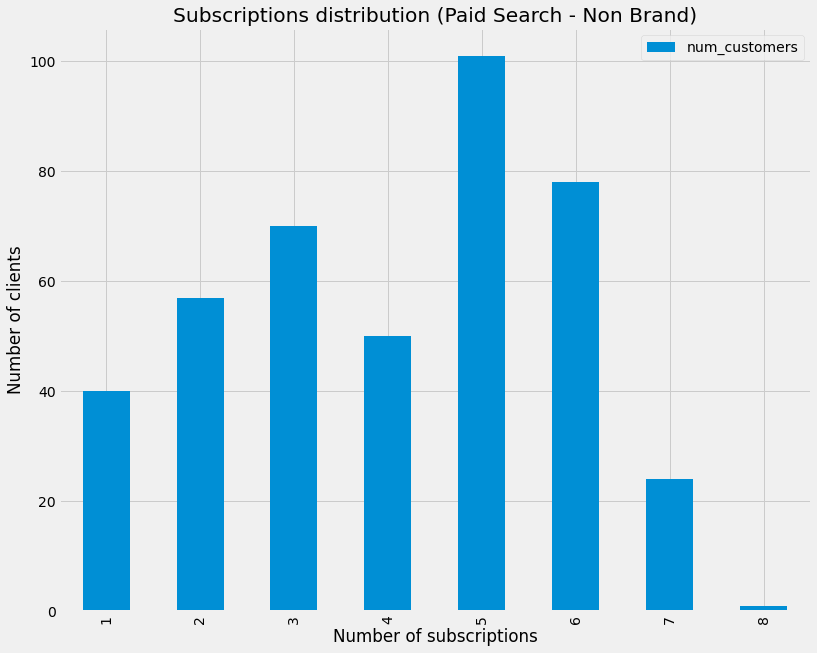

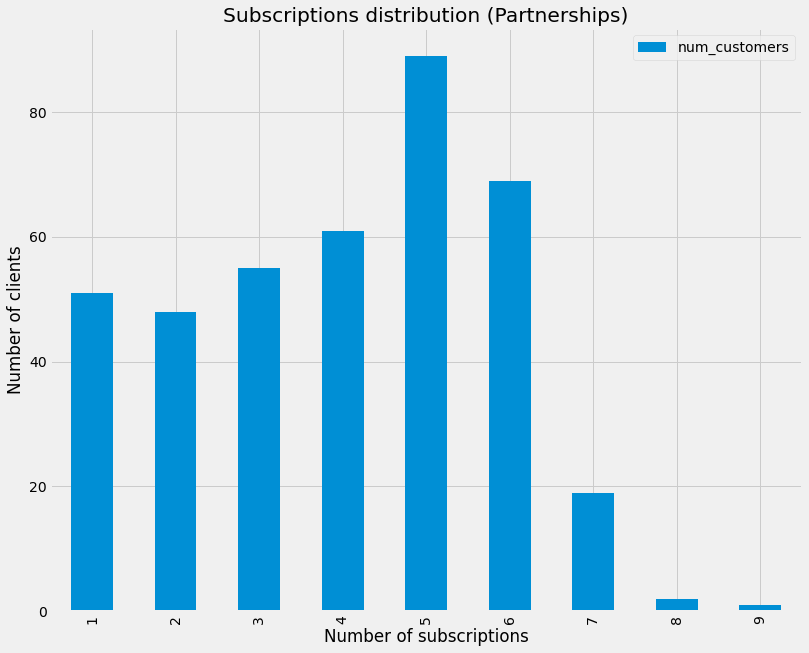

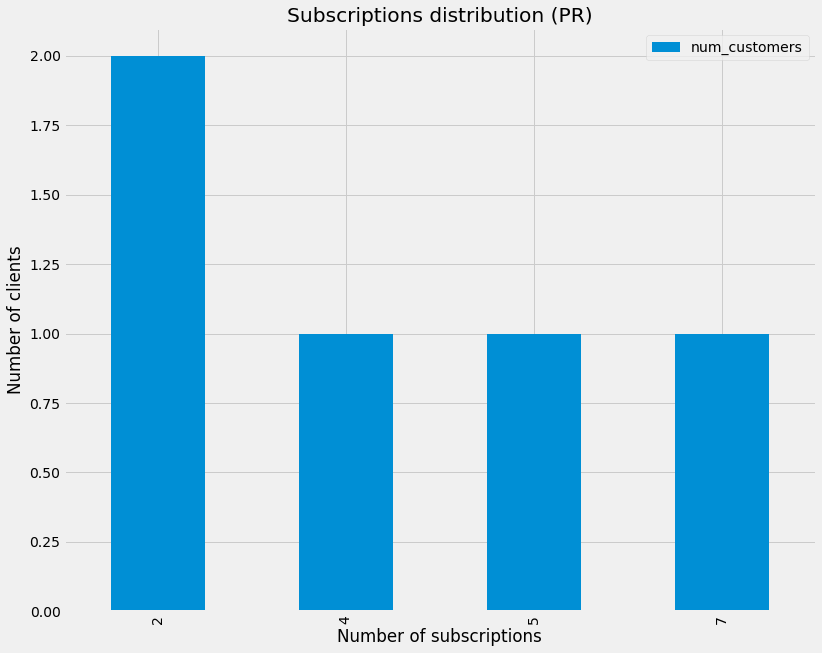

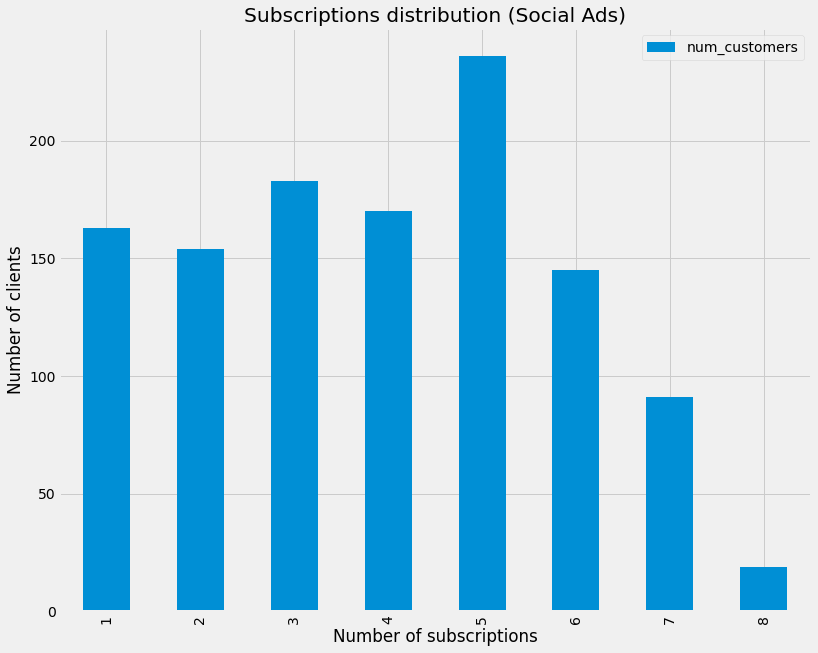

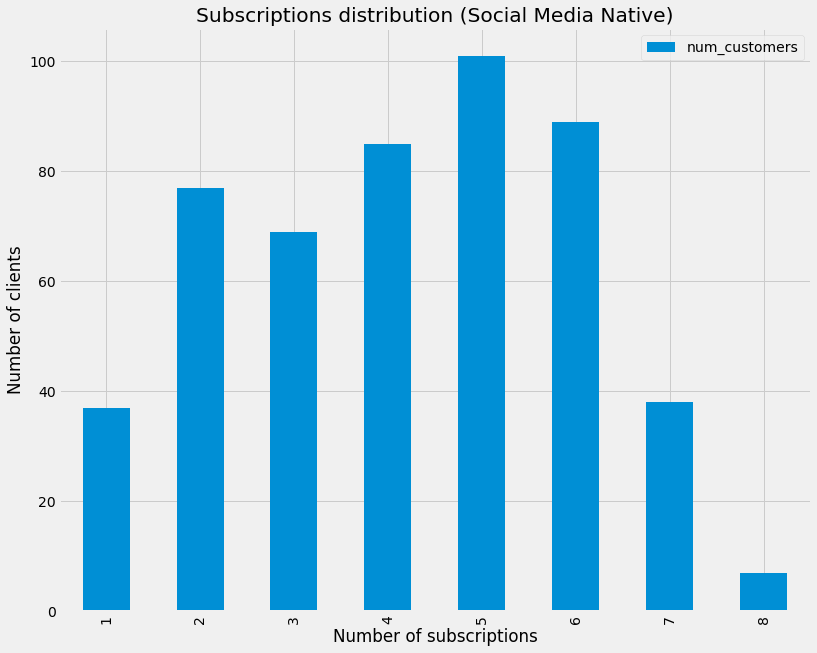

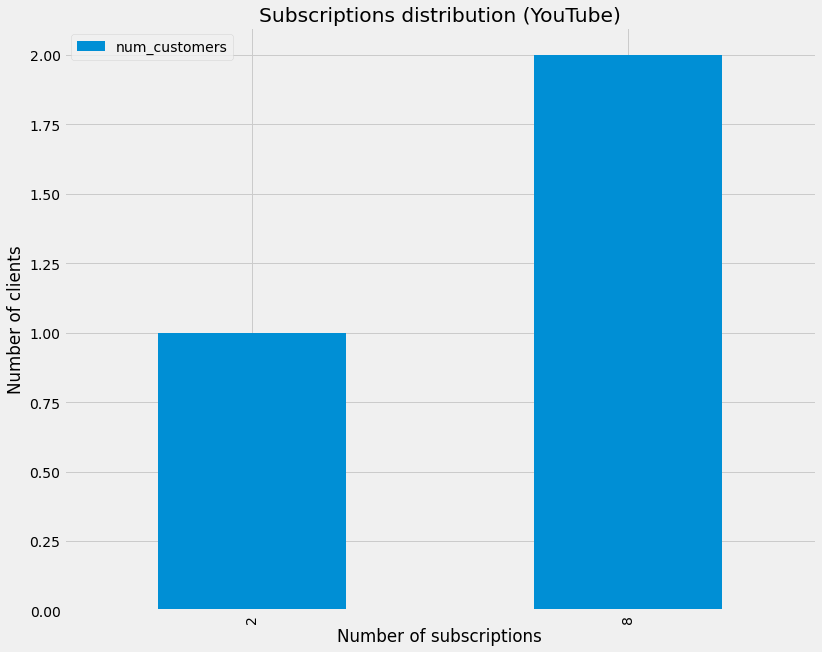

In [57]:
df_subscription_dist = pd.read_sql('SELECT * FROM vsubscriptions_distribution_per_channel', con=connection)

for channel in df_marketing["marketing_channel"].to_numpy():
    df_dist = df_subscription_dist[df_subscription_dist['marketing_channel'].eq(channel)][['num_subscriptions', 'num_customers']].set_index('num_subscriptions', drop=True)
    df_dist.plot(kind='bar', figsize=(12, 10), title=f"Subscriptions distribution ({channel})", xlabel="Number of subscriptions", ylabel="Number of clients",)